In [1]:
import pandas as pd
import numpy as np
import torch
import random
data = pd.read_csv('DATA3_filter.csv')

In [2]:
target_atem = data["3U78TE02A"] #A排烟温度
target_btem = data["3U78TE02B"] #B排烟温度
target_co = data["co_filter"] #CO浓度
target_nox = data["nox_filter"] #NOx浓度
target_eff = data["eff"] #锅炉热效率
load = data["MW"] #机组负荷

In [ ]:
target_eff.min()

# 双轴曲线

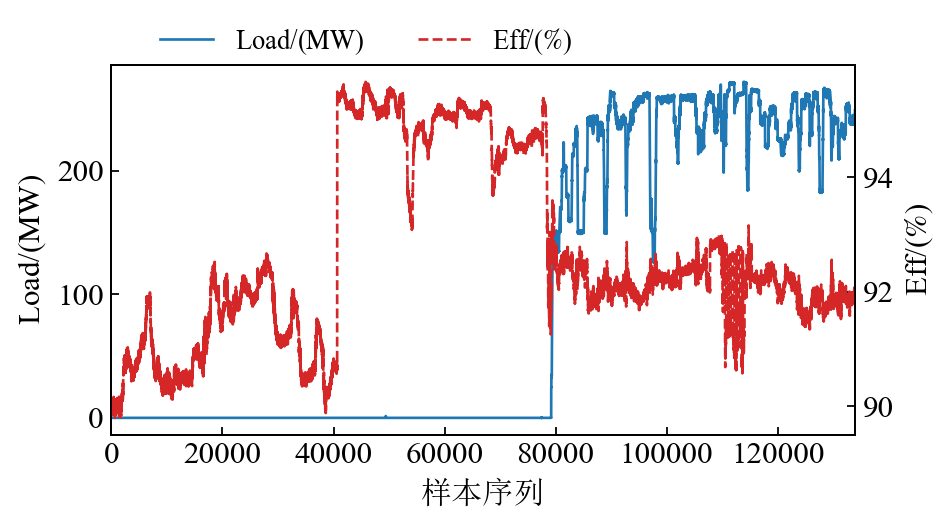

In [5]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

config = {
    "font.family": "times new roman",
    "font.size": 14,
    "mathtext.fontset": "stix",
    "xtick.direction": "in",
    "ytick.direction": "in",
}
rcParams.update(config)
color_list = plt.cm.tab10(np.linspace(0, 1, 12))
linesyle_list = ['-', '-', '--', ':']
fig, ax1 = plt.subplots(1, 1, figsize=(6, 3), dpi=160)

ax1.plot(np.arange(len(load)),
        load,
        color=color_list[1],
        linestyle=linesyle_list[1],
        linewidth=1.2)
ax1.set_xlabel("样本序列", {"family":"SimSun"})
ax1.set_ylabel("Load/($\mathrm{MW}$)", {"family":"times new roman"})   
ax1.set_xlim([0, 134000])
    
ax2 = ax1.twinx()
ax2.plot(np.arange(len(target_eff)),
        target_eff*100,
        color=color_list[4],
        linestyle=linesyle_list[2],
        linewidth=1.2)
ax2.set_ylabel("Eff/($\mathrm{\%}$)", {"family":"times new roman"})    
legend_font = {"family": "times new roman", "size": 12}
fig.legend(["Load/($\mathrm{MW}$)", "Eff/($\mathrm{\%}$)"], frameon=False, bbox_to_anchor=(0.63, 1.01), ncol=2, prop=legend_font)

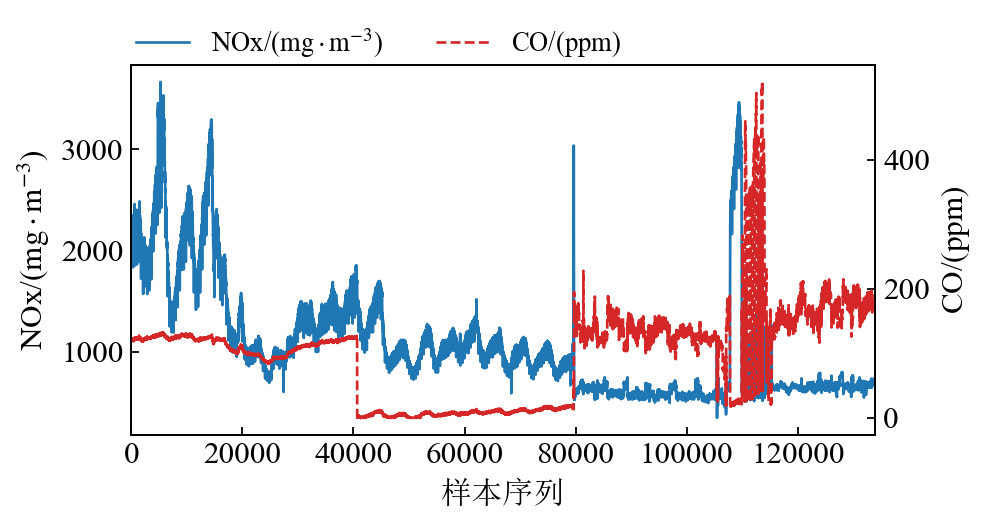

In [6]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
config = {
    "font.family": "times new roman",
    "font.size": 14,
    "mathtext.fontset": "stix",
    "xtick.direction": "in",
    "ytick.direction": "in",
}
rcParams.update(config)
color_list = plt.cm.tab10(np.linspace(0, 1, 12))
linesyle_list = ['-', '-', '--', ':']
fig, ax1 = plt.subplots(1, 1, figsize=(6, 3), dpi=160)

ax1.plot(np.arange(len(target_nox)),
        target_nox,
        color=color_list[1],
        linestyle=linesyle_list[1],
        linewidth=1.2)
ax1.set_xlabel("样本序列", {"family":"SimSun"})
ax1.set_ylabel("NOx/($\mathrm{mg \cdot m^{-3}}$)", {"family":"times new roman"})   
ax1.set_xlim([0, 134000])
    
ax2 = ax1.twinx()
ax2.plot(np.arange(len(target_co)),
        target_co,
        color=color_list[4],
        linestyle=linesyle_list[2],
        linewidth=1.2)
ax2.set_ylabel("CO/($\mathrm{ppm}$)", {"family":"times new roman"})   
legend_font = {"family": "times new roman", "size": 12}
fig.legend(["NOx/($\mathrm{mg \cdot m^{-3}}$)", "CO/($\mathrm{ppm}$)"], frameon=False, bbox_to_anchor=(0.66, 1.01), ncol=2, prop=legend_font)